<font size=3> 
    Here I literally use the example shown by: https://docs.astropy.org/en/stable/convolution/index.html


In [68]:
import sys
sys.path.append( '../astro_pola' )


from _astro_functions import ABMagToFluxJy, compare_to
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from astropy.convolution import Gaussian2DKernel
from scipy.signal import convolve as scipy_convolve
from astropy.convolution import convolve
from matplotlib.colors import LogNorm

sys.path.append('../..')

import os 
import sep 

# Blind15A_16_N24
<font size=3> From Jorges light curve construction we see that for this particular exposure-detector, the worst seeing is 1.4417, this corresponds to the FWHM of the exposure. Therefore we will convolve with a gaussian Kernel that has a fhwm of 1.4417 

In [72]:
worst_seeing = 1.44175923
sigma2fwhm = 2.*np.sqrt(2.*np.log(2.)) 
stdev = worst_seeing/sigma2fwhm
arcsec_to_pixel = 0.27#626 # arcsec/pixel
stdev/=arcsec_to_pixel # we transform to pixel values 
kernel = Gaussian2DKernel(x_stddev=stdev)

directory = 'Blind15A_16_N24'
convolved_images = {}

# Here I convolve all the images in the Blind15A_16_N24 directory, and save them in 
# the convolved_images dictionary 

for filename in os.listdir(directory):
    if filename.endswith('.fits'):
        fitsfile = get_pkg_data_filename(directory+'/'+filename)
        img = fits.open(fitsfile)[1]
        astropy_conv = convolve(img.data, kernel)
        visit = filename.split('_')[11]
        convolved_images[visit] = astropy_conv

        


In [70]:
r = worst_seeing/arcsec_to_pixel


In [50]:
r*.75

4.004886749999999

<font size=3> After doing convolution of the images, I do the light curve construction using SEP

In [73]:
info = pd.read_csv('info_Blind15A_16_p2.txt').sort_values('mjd')
stars = pd.read_csv('stars_from_Blind15A_16_p2.txt')


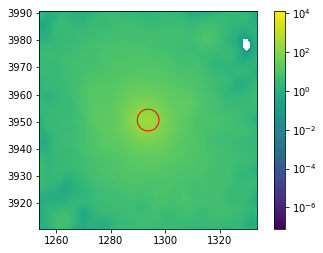

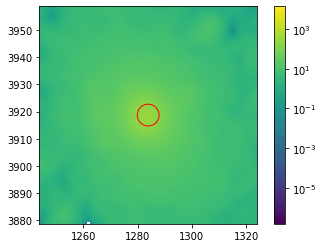

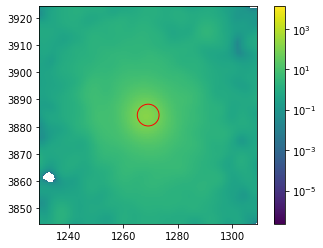

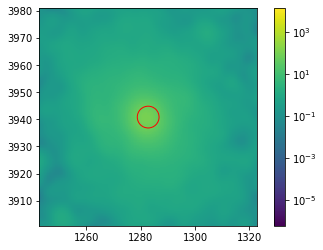

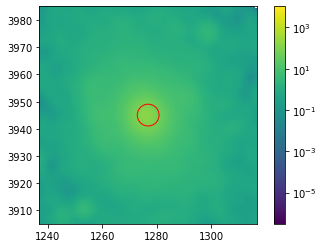

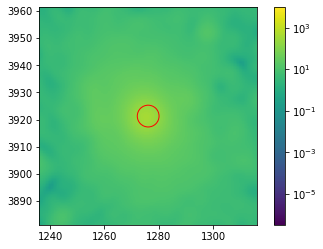

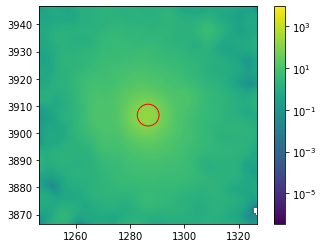

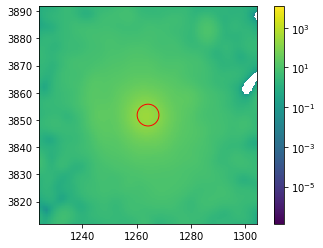

In [74]:
fluxes = []
fluxes_err = []
cutout = 40
r = worst_seeing/arcsec_to_pixel
for index, row in info.iterrows():
    data = convolved_images[str(int(row.visit))]
    flux, fluxerr, flag = sep.sum_circle(data, [row.x_pix], [row.y_pix], r*.75) # fixed aperture 
    
    fluxes.append(flux[0])
    fluxes_err.append(fluxerr[0])
    
    plt.imshow(data, norm=LogNorm())
    plt.xlim(row.x_pix - 40, row.x_pix + 40)
    plt.ylim(row.y_pix - 40, row.y_pix + 40)
    circle = plt.Circle((row.x_pix, row.y_pix), radius = r*.75, color='red', fill = False)
    plt.gca().add_patch(circle)
    plt.colorbar()
    plt.show()
    
    

In [75]:
dates, f_jorge, ferr_jorge = compare_to('Blind15A_16_N24_1292_3950_g_psf_ff.csv', sfx='flx', factor=0.75)
dates, m_jorge, merr_jorge = compare_to('Blind15A_16_N24_1292_3950_g_psf_ff.csv', sfx='mag', factor=0.75)
fjy_jorge, ferrjy_jorge = ABMagToFluxJy(m_jorge, mab_err=merr_jorge)


Text(0, 0.5, 'Excess flux')

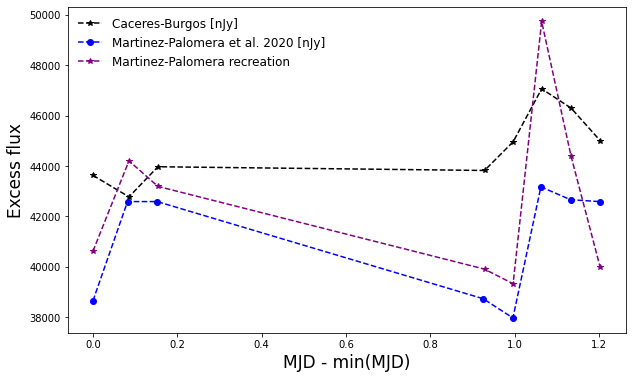

In [92]:
plt.figure(figsize=(10,6))
plt.plot(info.mjd - min(info.mjd), fluxes*info.calib ,'*', ls='--', color='black', label='Caceres-Burgos [nJy]')
plt.plot(dates, fjy_jorge*1e9, 'o', ls='--', color='blue', label='Martinez-Palomera et al. 2020 [nJy]')
plt.plot(info.mjd - min(info.mjd), ABMagToFluxJy(-2.5*np.log10(f_jorge) +  info.zp)*1e9,'*', ls='--', color='purple', label='Martinez-Palomera recreation')
#plt.plot(info.mjd - min(info.mjd), ABMagToFluxJy(-2.5*np.log10(fluxes) +  info.zp)*1e9,'*', ls='dotted', color='red', label='Caceres-Burgos recreation')

plt.legend(frameon=False, fontsize=12)
plt.xlabel('MJD - min(MJD)', fontsize=17)
plt.ylabel('Excess flux', fontsize=17)

In [86]:
 ABMagToFluxJy(-2.5*np.log10(f_jorge) + info.zp)*1e9

0    40610.467360
1    44201.623796
2    43187.484158
3    39900.112550
4    39320.069817
5    49739.967176
6    44375.972112
7    39966.123162
dtype: float64

In [93]:
2.5*np.log10(info.expTime)

2    4.836246
1    4.836246
0    4.836246
5    4.836246
6    4.836246
7    4.836246
4    4.836246
3    4.836246
Name: expTime, dtype: float64

Text(0, 0.5, 'Excess flux')

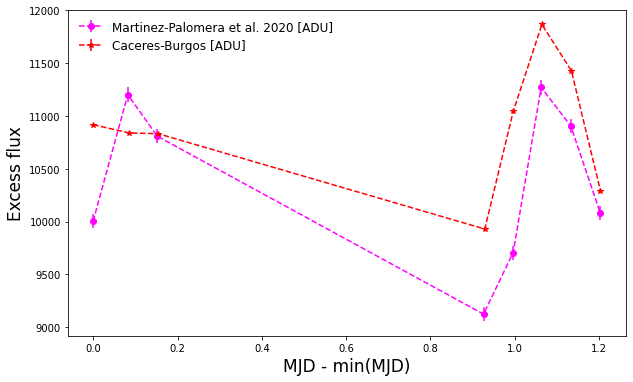

In [77]:
plt.figure(figsize=(10,6))
plt.errorbar(dates, f_jorge, yerr=ferr_jorge, fmt='o', ls='--',color='magenta', label='Martinez-Palomera et al. 2020 [ADU]')
plt.errorbar(info.mjd - min(info.mjd), fluxes ,yerr=fluxes_err,fmt='*', ls='--', color='red', label='Caceres-Burgos [ADU]')

plt.legend(frameon=False, fontsize=12)
plt.xlabel('MJD - min(MJD)', fontsize=17)
plt.ylabel('Excess flux', fontsize=17)

Text(0, 0.5, 'magnitude')

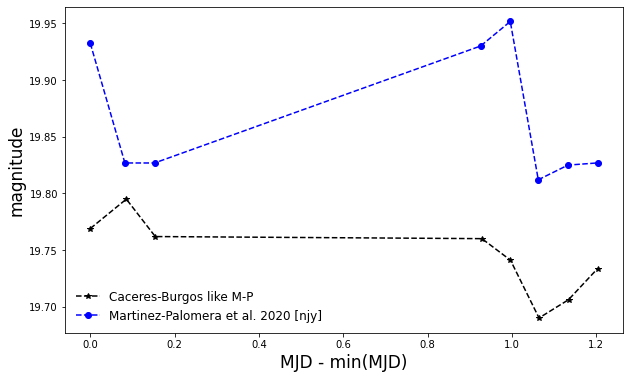

In [9]:


plt.figure(figsize=(10,6))
plt.plot(info.mjd - min(info.mjd), -2.5*np.log10(fluxes) + info.zp,'*', ls='--', color='black', label='Caceres-Burgos like M-P')
plt.plot(dates, m_jorge, 'o', ls='--', color='blue', label='Martinez-Palomera et al. 2020 [njy]')

plt.legend(frameon=False, fontsize=12)
plt.xlabel('MJD - min(MJD)', fontsize=17)
plt.ylabel('magnitude', fontsize=17)

# Blind15A_24_S16

In [ ]:
1.25280054

In [21]:
r*.75

3.578065498857578

In [54]:
worst_seeing = 1.25280054
sigma2fwhm = 2.*np.sqrt(2.*np.log(2.)) 
stdev = worst_seeing/sigma2fwhm
arcsec_to_pixel = 0.27#626 # arcsec/pixel
stdev/=arcsec_to_pixel # we transform to pixel values 
kernel = Gaussian2DKernel(x_stddev=stdev)

directory = 'Blind15A_24_S16'
convolved_images = {}

# Here I convolve all the images in the Blind15A_16_N24 directory, and save them in 
# the convolved_images dictionary 

for filename in os.listdir(directory):
    if filename.endswith('.fits'):
        fitsfile = get_pkg_data_filename(directory+'/'+filename)
        img = fits.open(fitsfile)[1]
        astropy_conv = convolve(img.data, kernel)
        visit = filename.split('_')[11]
        convolved_images[visit] = astropy_conv

        
info = pd.read_csv('info_Blind15A_24.txt').sort_values('mjd')


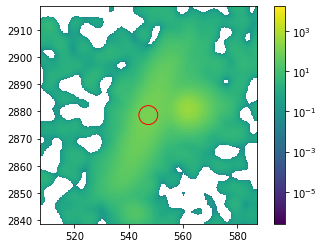

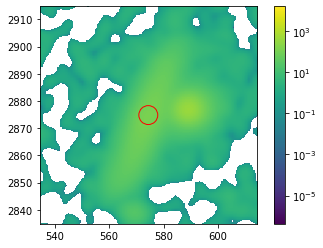

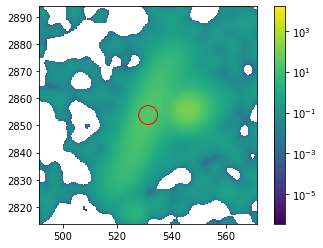

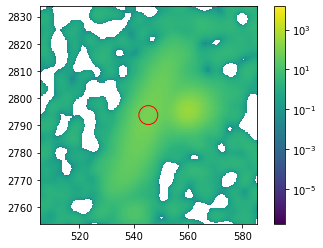

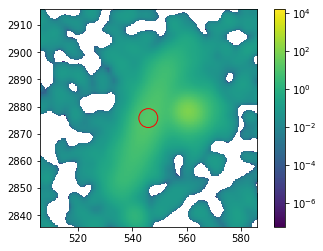

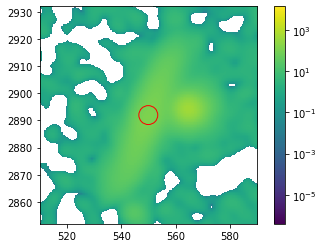

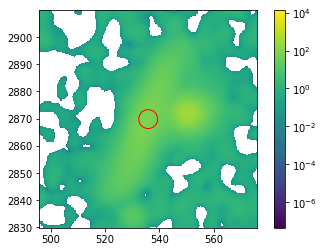

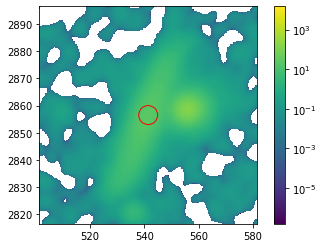

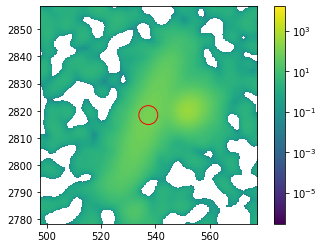

In [55]:
fluxes = []
fluxes_err = []
cutout = 40
r = worst_seeing/arcsec_to_pixel
for index, row in info.iterrows():
    data = convolved_images[str(int(row.visit))]
    flux, fluxerr, flag = sep.sum_circle(data, [row.x_pix], [row.y_pix], r*0.75) # fixed aperture 
    
    fluxes.append(flux[0])
    fluxes_err.append(fluxerr[0])
    
    plt.imshow(data, norm=LogNorm())
    plt.xlim(row.x_pix - 40, row.x_pix + 40)
    plt.ylim(row.y_pix - 40, row.y_pix + 40)
    circle = plt.Circle((row.x_pix, row.y_pix), radius = r*.75, color='red', fill = False)
    plt.gca().add_patch(circle)
    plt.colorbar()
    plt.show()
    
    

In [56]:
dates, f_jorge, ferr_jorge = compare_to('Blind15A_24_S16_0547_2878_g_psf_ff.csv', sfx='flx', factor=0.75)
dates, m_jorge, merr_jorge = compare_to('Blind15A_24_S16_0547_2878_g_psf_ff.csv', sfx='mag', factor=0.75)
fjy_jorge, ferrjy_jorge = ABMagToFluxJy(m_jorge, mab_err=merr_jorge)


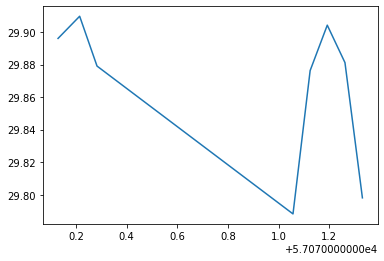

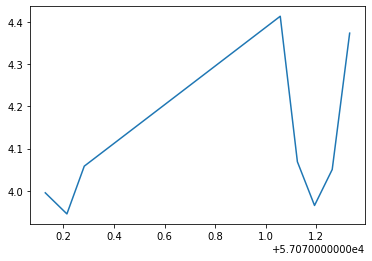

In [12]:
#plt.plot(info.mjd,info.calib)
plt.plot(info.mjd, info.zp)
plt.show()
plt.plot(info.mjd, info.calib)

Text(0, 0.5, 'Excess flux')

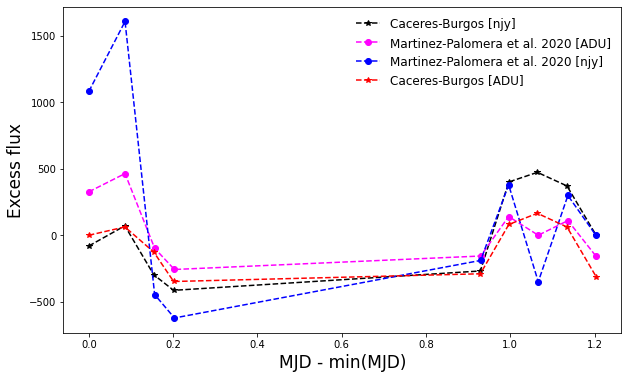

In [58]:
plt.figure(figsize=(10,6))
plt.plot(info.mjd - min(info.mjd), fluxes*info.calib - np.median(fluxes*info.calib),'*', ls='--', color='black', label='Caceres-Burgos [njy]')
plt.plot(dates, f_jorge-np.median(f_jorge), 'o', ls='--',color='magenta', label='Martinez-Palomera et al. 2020 [ADU]')
plt.plot(dates, fjy_jorge*1e9 - np.median(fjy_jorge*1e9), 'o', ls='--', color='blue', label='Martinez-Palomera et al. 2020 [njy]')
plt.plot(info.mjd - min(info.mjd), fluxes - np.median(fluxes),'*', ls='--', color='red', label='Caceres-Burgos [ADU]')

plt.legend(frameon=False, fontsize=12)
plt.xlabel('MJD - min(MJD)', fontsize=17)
plt.ylabel('Excess flux', fontsize=17)

Text(0, 0.5, 'Excess flux')

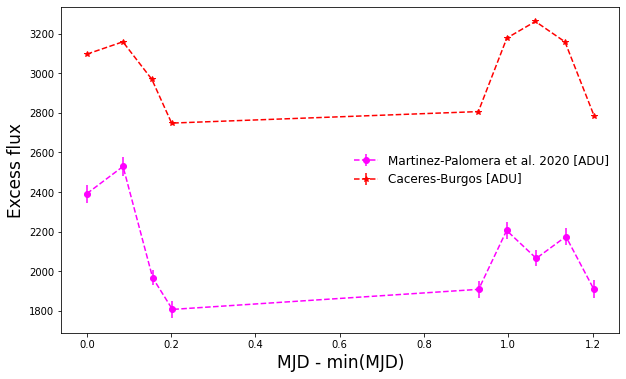

In [57]:
plt.figure(figsize=(10,6))
plt.errorbar(dates, f_jorge, yerr=ferr_jorge, fmt='o', ls='--',color='magenta', label='Martinez-Palomera et al. 2020 [ADU]')
plt.errorbar(info.mjd - min(info.mjd), fluxes ,yerr=fluxes_err,fmt='*', ls='--', color='red', label='Caceres-Burgos [ADU]')

plt.legend(frameon=False, fontsize=12)
plt.xlabel('MJD - min(MJD)', fontsize=17)
plt.ylabel('Excess flux', fontsize=17)

Text(0, 0.5, 'magnitude')

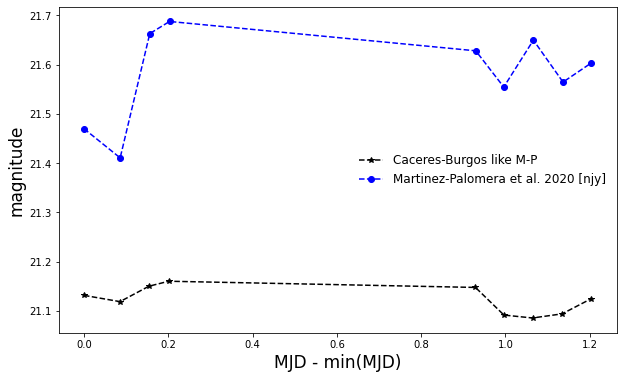

In [66]:
plt.figure(figsize=(10,6))
plt.plot(info.mjd - min(info.mjd), -2.5*np.log10(fluxes)+ info.zp,'*', ls='--', color='black', label='Caceres-Burgos like M-P')
plt.plot(dates, m_jorge, 'o', ls='--', color='blue', label='Martinez-Palomera et al. 2020 [njy]')

plt.legend(frameon=False, fontsize=12)
plt.xlabel('MJD - min(MJD)', fontsize=17)
plt.ylabel('magnitude', fontsize=17)

In [65]:
-2.5*np.log10(fluxes) + info.zp # + 2.5*np.log10(info.expTime)

2    21.131298
1    21.118506
3    21.149856
0    21.159965
7    21.147363
6    21.091211
8    21.085308
5    21.093664
4    21.124470
Name: zp, dtype: float64

In [27]:
2.5*np.log10(info.expTime) - info.zp

2   -25.021996
1   -25.030856
3   -24.995126
0   -24.921171
7   -24.931277
6   -25.010016
8   -25.032406
5   -25.005970
4   -24.900172
dtype: float64